In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import datetime
import functions_hiwi as fct
import warnings
import xarray as xr

In [2]:
# set ignore warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [3]:
# set main directory
main_dir = r'C:\Users\illic\Python\data_hiwi\Emschergenossenschaft'

In [4]:
# set path to data
emscher_path = os.path.join(main_dir, r'EGLV_PWS_dataset_5min_v03.nc')

In [5]:
# read data
ds_emscher = xr.open_dataset(emscher_path)

In [6]:
# id neu setzen
id = np.arange(1, len(ds_emscher.id) + 1, 1) # oder: id = ['id_' + str(id) for id in (np.arange(1, len(ds_emscher.id) + 1, 1))]
ds_emscher['id'] = id

In [7]:
# create DataFrame
df_emscher = pd.DataFrame(data=ds_emscher.rainfall.sel(id=slice(1, 10)).values.T, index=ds_emscher.time.values ,columns=ds_emscher.id.sel(id=slice(1, 10)).values)

In [8]:
df_emscher

,1,2,3,4,5,6,7,8,9,10
2014-04-26 16:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-26 16:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-26 16:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-26 16:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-26 16:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-01-10 23:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-10 23:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-10 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-10 23:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


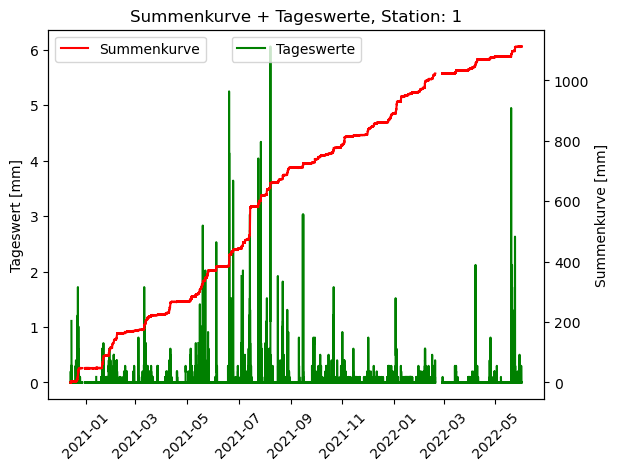

Gesamtniederschlag über Zeitraum: 1112.6 mm



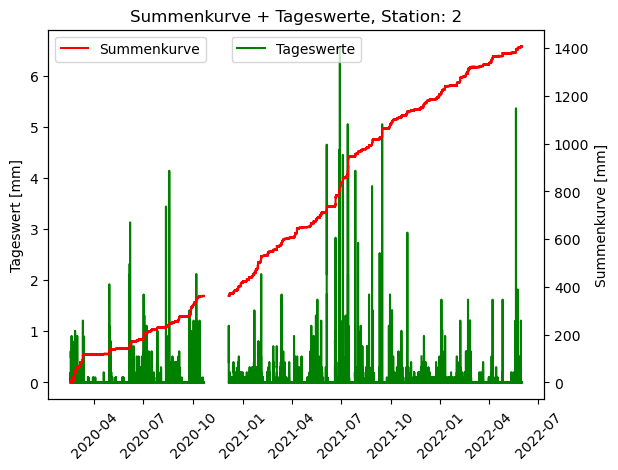

Gesamtniederschlag über Zeitraum: 1406.42 mm



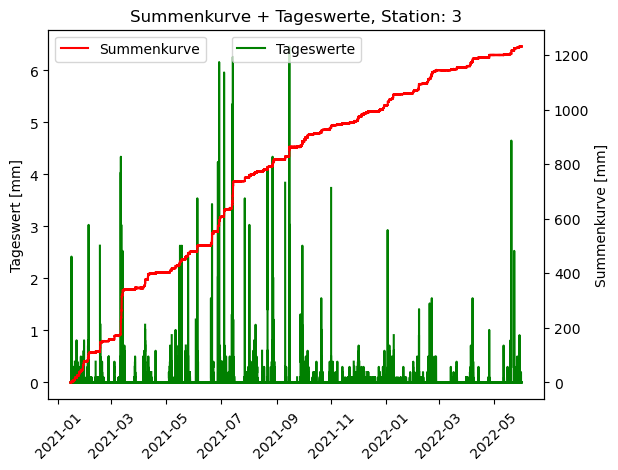

Gesamtniederschlag über Zeitraum: 1231.49 mm



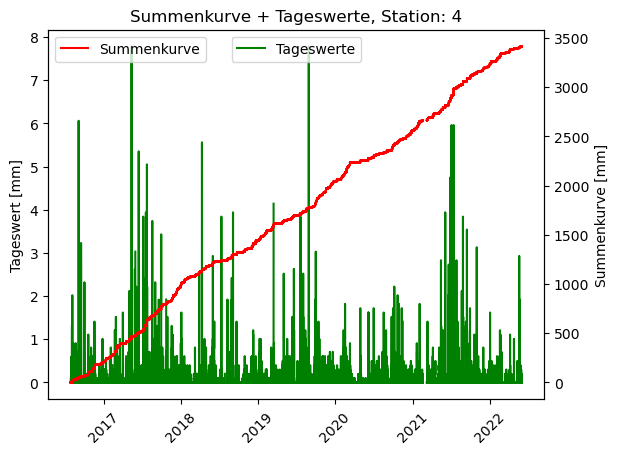

Gesamtniederschlag über Zeitraum: 3413.55 mm



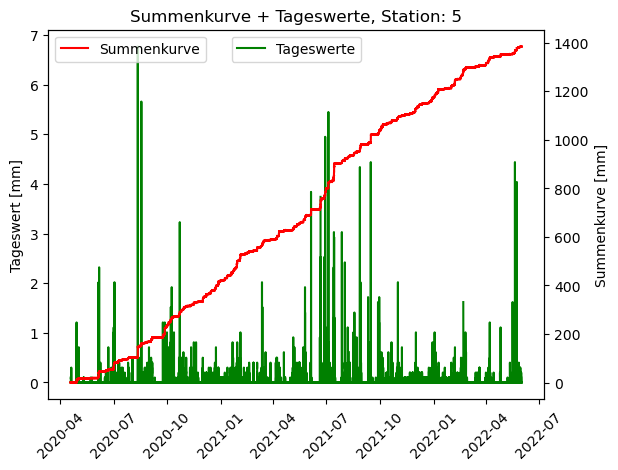

Gesamtniederschlag über Zeitraum: 1384.74 mm



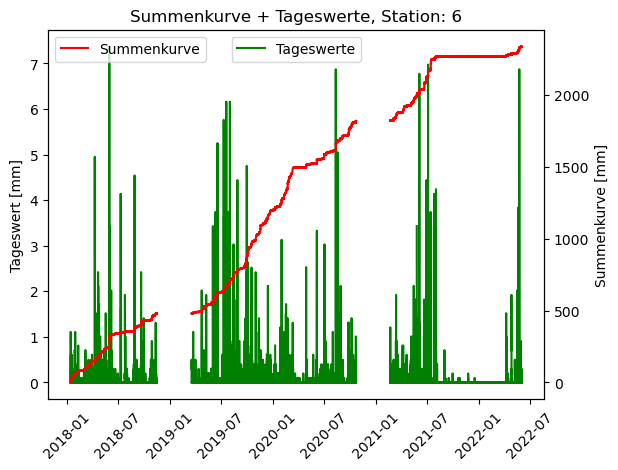

Gesamtniederschlag über Zeitraum: 2340.23 mm



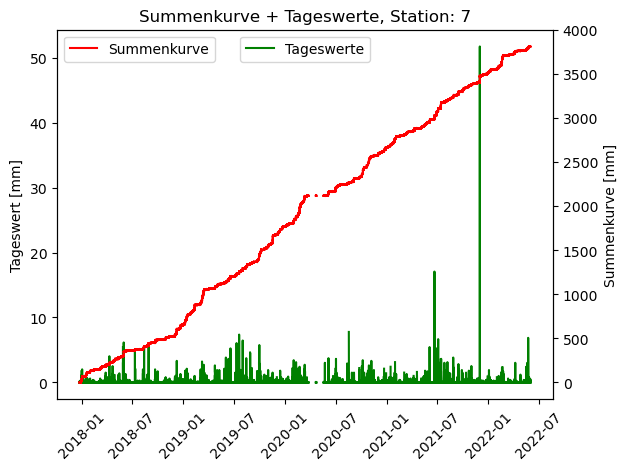

Gesamtniederschlag über Zeitraum: 3815.28 mm



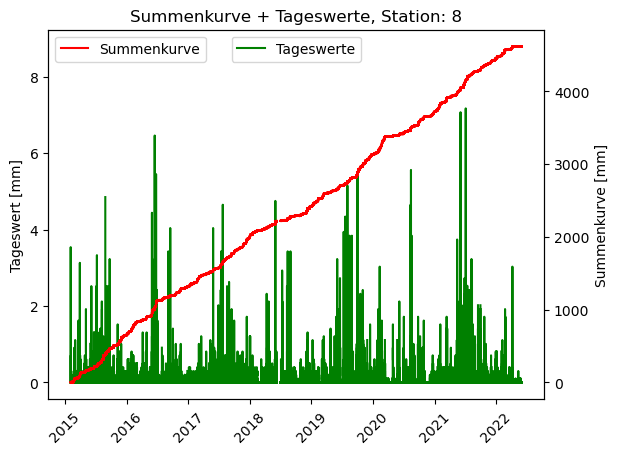

Gesamtniederschlag über Zeitraum: 4618.64 mm



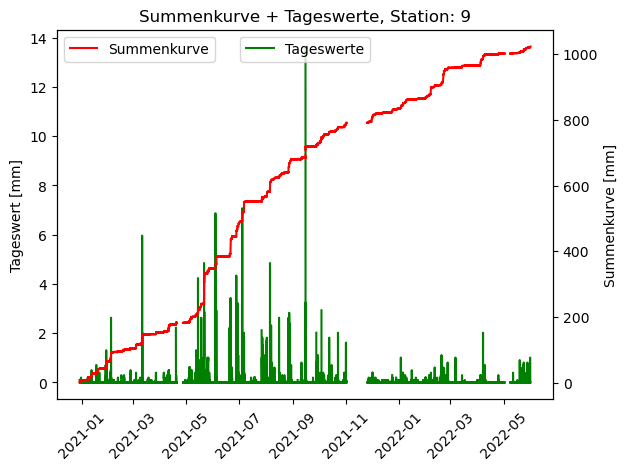

Gesamtniederschlag über Zeitraum: 1023.74 mm



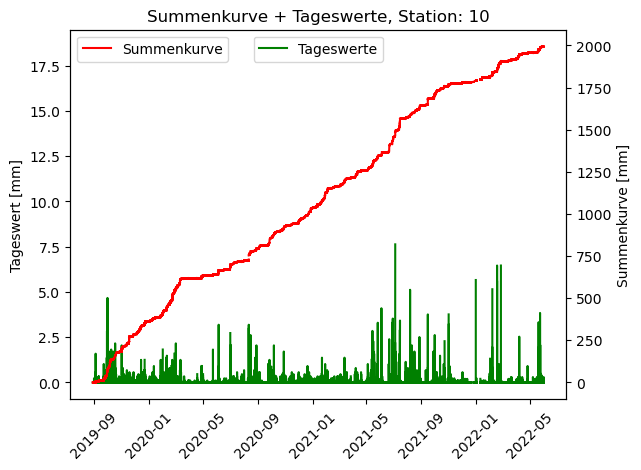

Gesamtniederschlag über Zeitraum: 1993.44 mm



In [18]:
for i in range(1, 11):
    fct.sum_curve(df_emscher, i, df_emscher.index[0], df_emscher.index[-1])

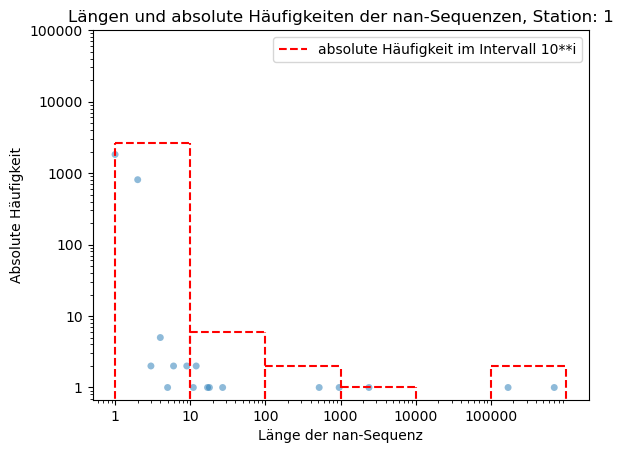

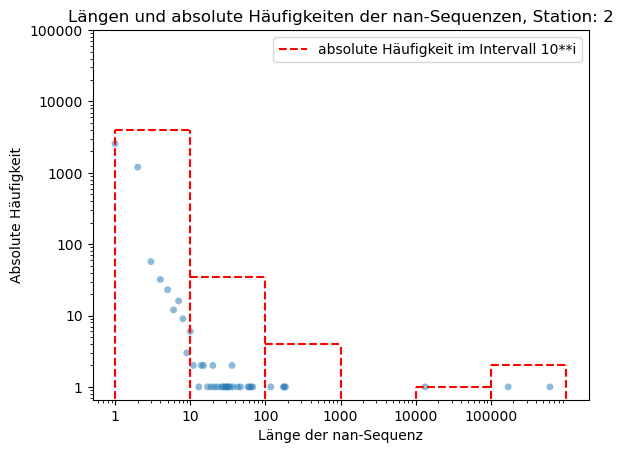

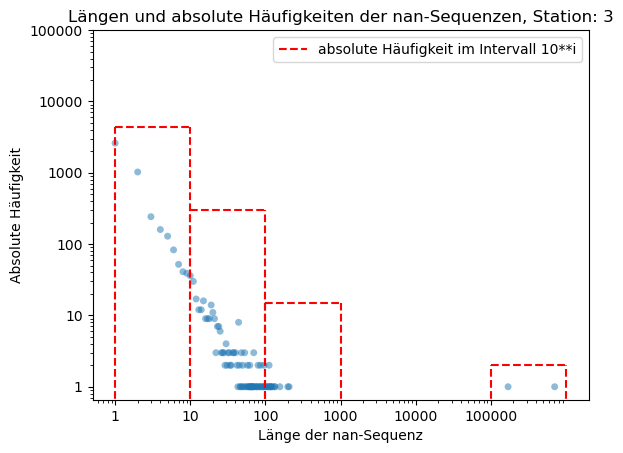

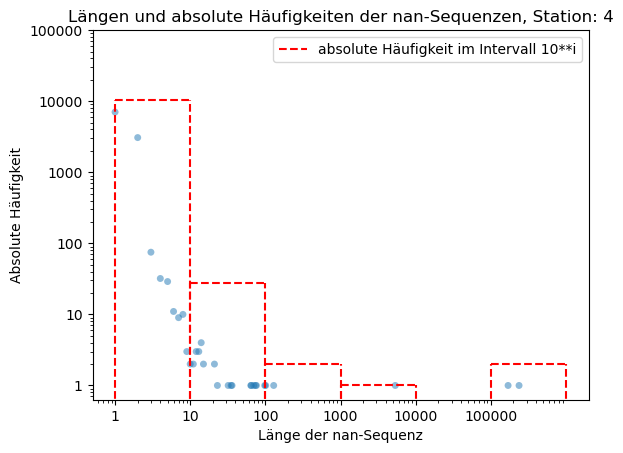

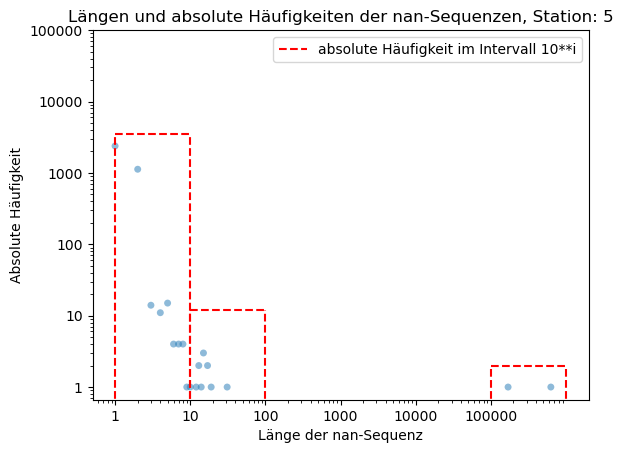

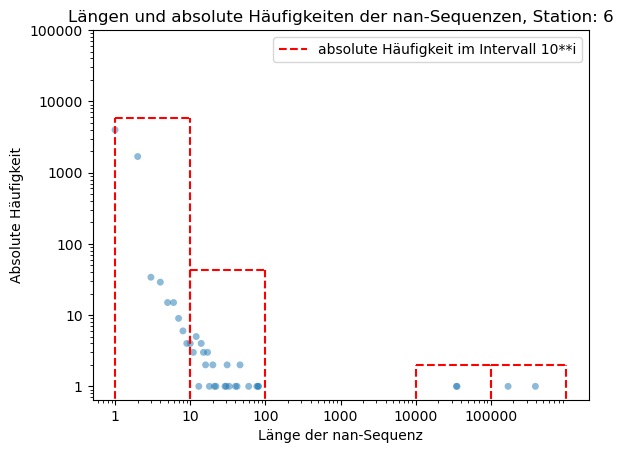

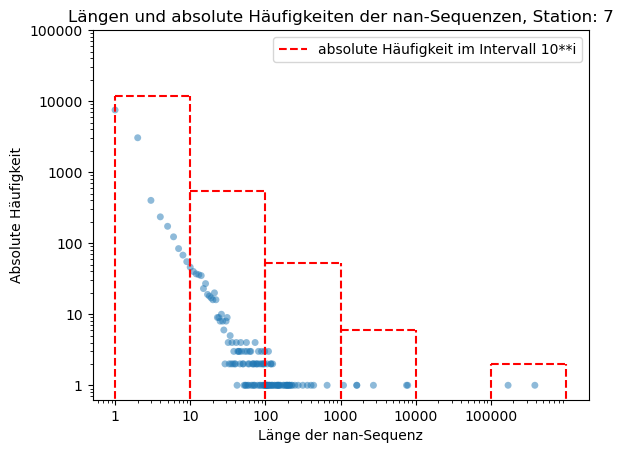

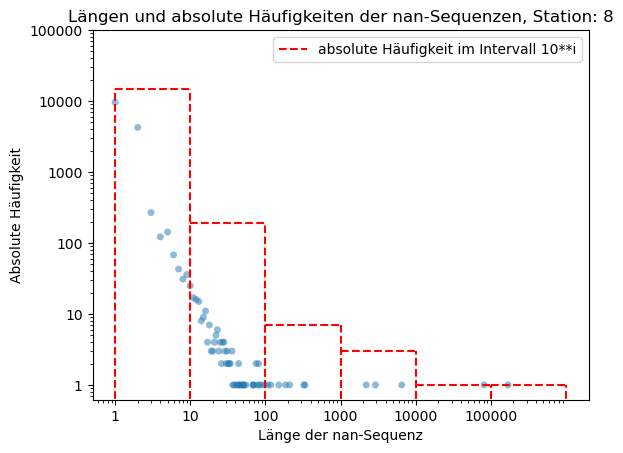

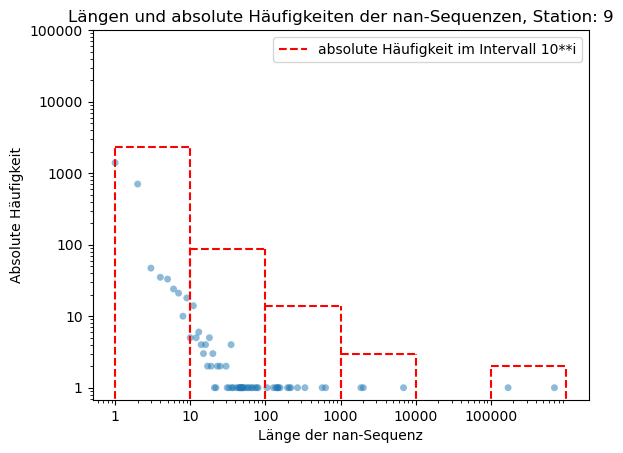

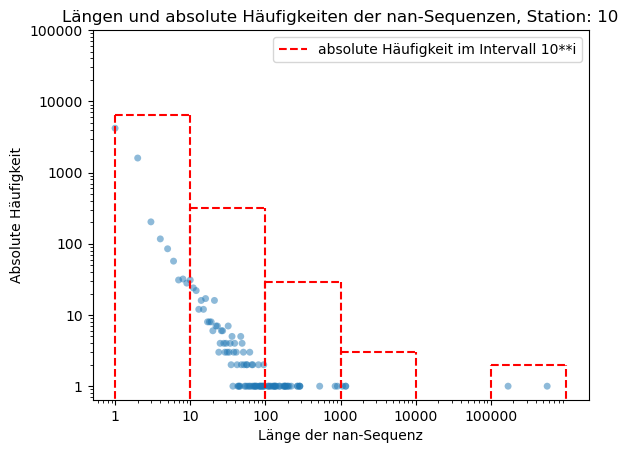

In [10]:
for i in range(1, 11):
    fct.histogramm_scatter(df_emscher, i, '5min')

In [11]:
for i in range(1, 11):
    x, y = np.unique(fct.list_nan_sequences_schnell(df_emscher, i, '5min')[2], return_counts=True)
    print('id', str(i) + ':', 'longest sequenze: ', x.max())

id 1: longest sequenze:  698040
id 2: longest sequenze:  611374
id 3: longest sequenze:  707042
id 4: longest sequenze:  237357
id 5: longest sequenze:  628943
id 6: longest sequenze:  391654
id 7: longest sequenze:  385399
id 8: longest sequenze:  169632
id 9: longest sequenze:  702375
id 10: longest sequenze:  561859


In [14]:
for i in range(1, 11):
    print('id', str(i) + ':', 'Anzahl Peaks:', len(fct.get_data_nan_seq_before_peak(df_emscher, 'sc', i, 0.99)[3]))

id 1: Anzahl Peaks: 23
id 2: Anzahl Peaks: 23
id 3: Anzahl Peaks: 61
id 4: Anzahl Peaks: 136
id 5: Anzahl Peaks: 20
id 6: Anzahl Peaks: 57
id 7: Anzahl Peaks: 191
id 8: Anzahl Peaks: 174
id 9: Anzahl Peaks: 26
id 10: Anzahl Peaks: 132


In [60]:
def sum_curve(data, station, date_start, date_end):

    # set DataFrame for this run of this funktion
    dataframe = data
    
    # Messwerte der Station aufsummieren
    sum_list = dataframe.cumsum().values
    sum = dataframe.sum().item()

    # "Summendataframe" erstellen
    index_sum_df = dataframe.time.values
    sum_df = pd.Series(data=sum_list, index=index_sum_df)

    # Subplot erstellen
    fig, ax = plt.subplots()

    # plot Tageswerte
    ax.plot(index_sum_df, dataframe, label='Tageswerte', color='green')
    ax.set_ylabel('Tageswert [mm]')
    plt.xticks(rotation=45)
    plt.legend(loc=9)

    # plot Summenkurve
    ax = ax.twinx()
    ax.plot(index_sum_df, sum_list, label='Summenkurve', color='red')
    ax.set_ylabel('Summenkurve [mm]')
    plt.legend(loc=2)

    name_plot = 'Summenkurve + Tageswerte, Station: ' + str(station)
    plt.title(name_plot)
    plt.xlabel('DateTime')
    plt.legend()
    
    plt.show()
    plt.close()
    
    return print('Gesamtniederschlag über Zeitraum:', round(sum, 2), 'mm\n') # (print('Index Station', str(station), ': \n\n', index_sum_df, '\n\n', 'Summe aktuel zu Zeitstempel:\n\n', sum_df))


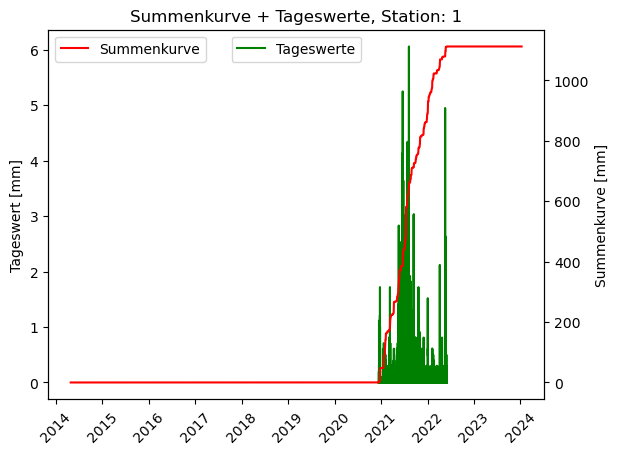

Gesamtniederschlag über Zeitraum: 1112.6 mm



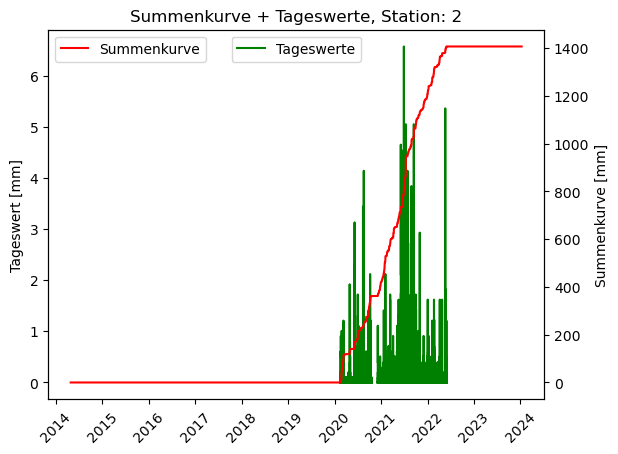

Gesamtniederschlag über Zeitraum: 1406.42 mm



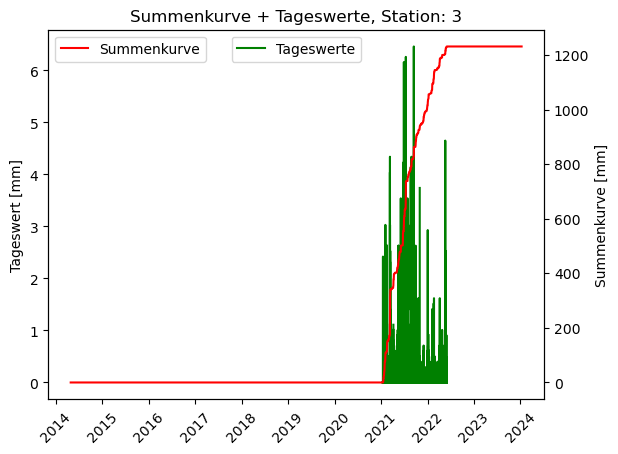

Gesamtniederschlag über Zeitraum: 1231.49 mm



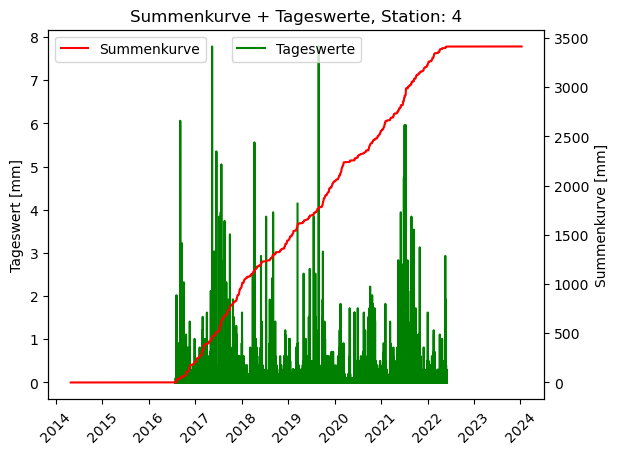

Gesamtniederschlag über Zeitraum: 3413.55 mm



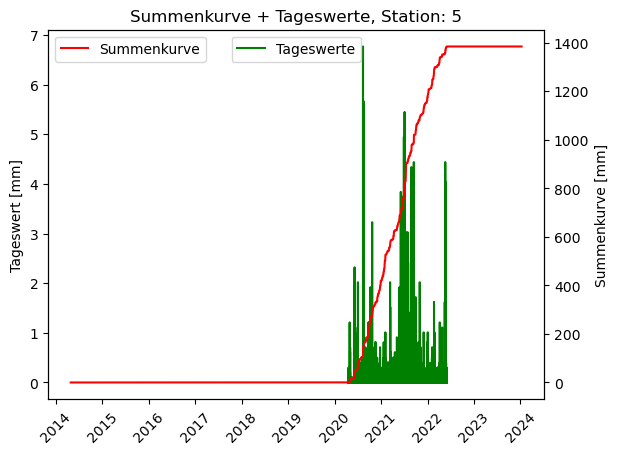

Gesamtniederschlag über Zeitraum: 1384.74 mm



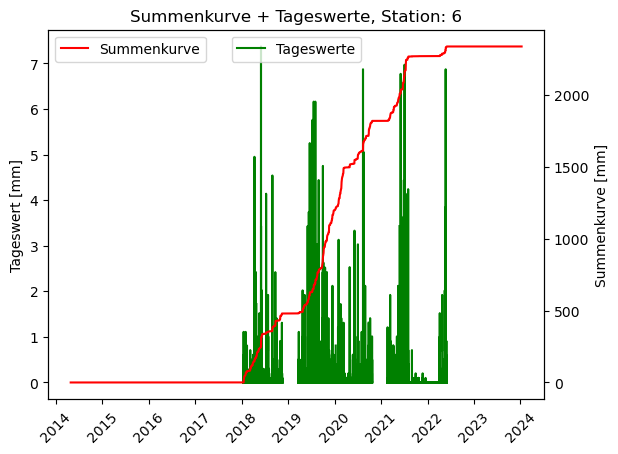

Gesamtniederschlag über Zeitraum: 2340.23 mm



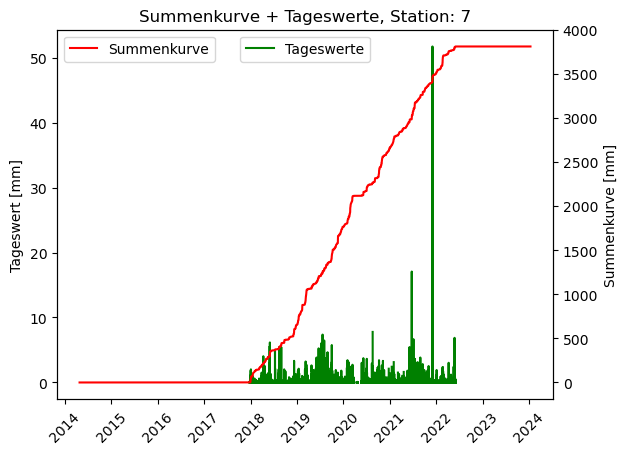

Gesamtniederschlag über Zeitraum: 3815.28 mm



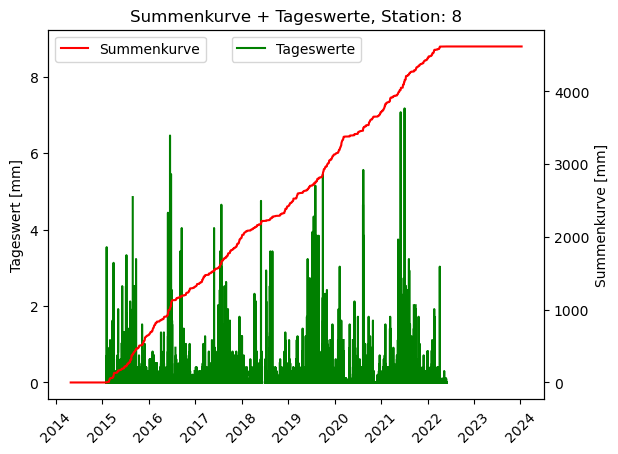

Gesamtniederschlag über Zeitraum: 4618.64 mm



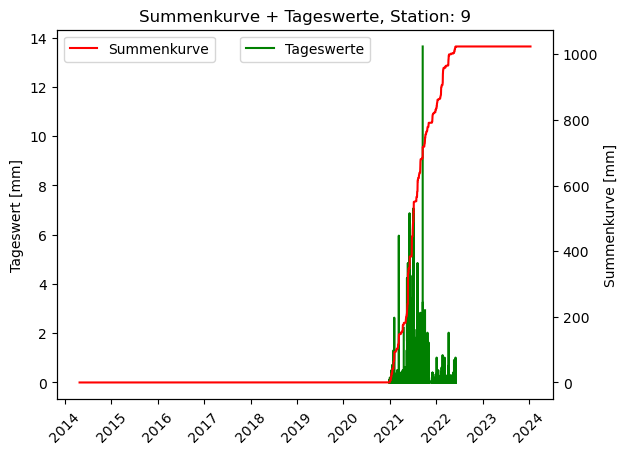

Gesamtniederschlag über Zeitraum: 1023.74 mm



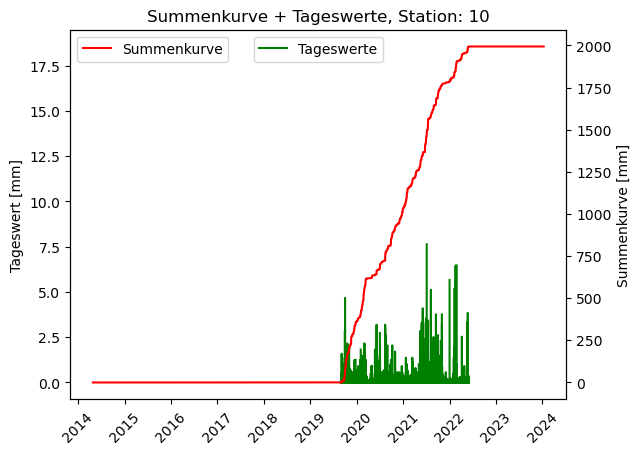

Gesamtniederschlag über Zeitraum: 1993.44 mm



In [70]:
for i in range(1, 11):
    sum_curve(ds_emscher.rainfall.sel(id=i), i, ds_emscher.sel(id=i).time[0], ds_emscher.sel(id=i).time[-1])

In [71]:
list_nans_gesamt = []
list_nan_sequences = []
list_nan_sequences_1_2 = []
list_peaks = []
list_nans_gesamt_corr = []
list_nan_sequences_corr = []
list_verhaeltnis_nans = []
list_verhaeltnis_nan_sequences = []

for station in range(1, 11):
    sum_nan_u = df_emscher[station].isna().sum()
    list_u = fct.list_nan_sequences_schnell(df_emscher, station, '5min')[2]
    x_u, y_u = np.unique(list_u, return_counts=True)
    peaks_u = fct.get_data_nan_seq_before_peak(df_emscher, 'sc', station, 0.99)[3]

    print(station, 'unkorrigiert')
    print('   nans gesamt: ', sum_nan_u)
    print('   nan sequenzen: ', y_u.sum())
    print('   davon 1er und 2er nan sequenzen: ', y_u[0:2].sum())
    print('   peaks: ', len(peaks_u))

    list_nans_gesamt.append(sum_nan_u)
    list_nan_sequences.append(y_u.sum())
    list_nan_sequences_1_2.append(y_u[0:2].sum())
    list_peaks.append(len(peaks_u))

    # sum_nan = df_reutlingen_corrected[station].isna().sum()
    # list = fct.list_nan_sequences_schnell(df_reutlingen_corrected, station, '5min')[2]
    # x, y = np.unique(list, return_counts=True)
    # peaks = fct.get_data_nan_seq_before_peak(df_reutlingen_corrected, 'sc', station, 0.99)[3]

    # print(station, 'korrigiert')
    # print('   nans gesamt: ', sum_nan)
    # print('   nan sequenzen: ', y.sum())
    # print('Verhältnis korrigiert zu unkorrigiert: ', round(((sum_nan_u - sum_nan)/sum_nan_u)*100, 2), '% werden korrigiert')

    # list_nans_gesamt_corr.append(sum_nan)
    # list_nan_sequences_corr.append(y.sum())
    # list_verhaeltnis_nans.append(round(((sum_nan_u - sum_nan)/sum_nan_u)*100))
    # list_verhaeltnis_nan_sequences.append(round(((y_u.sum() - y.sum())/y_u.sum())*100))
    

1 unkorrigiert
   nans gesamt:  875135
   nan sequenzen:  2651
   davon 1er und 2er nan sequenzen:  2628
   peaks:  23
2 unkorrigiert
   nans gesamt:  801910
   nan sequenzen:  3963
   davon 1er und 2er nan sequenzen:  3769
   peaks:  23
3 unkorrigiert
   nans gesamt:  895064
   nan sequenzen:  4694
   davon 1er und 2er nan sequenzen:  3626
   peaks:  61
4 unkorrigiert
   nans gesamt:  427306
   nan sequenzen:  10311
   davon 1er und 2er nan sequenzen:  10109
   peaks:  136
5 unkorrigiert
   nans gesamt:  803653
   nan sequenzen:  3575
   davon 1er und 2er nan sequenzen:  3508
   peaks:  20
6 unkorrigiert
   nans gesamt:  640600
   nan sequenzen:  5822
   davon 1er und 2er nan sequenzen:  5663
   peaks:  57
7 unkorrigiert
   nans gesamt:  620011
   nan sequenzen:  12307
   davon 1er und 2er nan sequenzen:  10565
   peaks:  191
8 unkorrigiert
   nans gesamt:  289935
   nan sequenzen:  14806
   davon 1er und 2er nan sequenzen:  13891
   peaks:  174
9 unkorrigiert
   nans gesamt:  892117


In [72]:
ds_emscher

<xarray.Dataset>
Dimensions:      (time: 1021338, id: 3550)
Coordinates:
  * time         (time) datetime64[ns] 2014-04-26T16:30:00 ... 2024-01-10T23:...
  * id           (id) int32 1 2 3 4 5 6 7 ... 3544 3545 3546 3547 3548 3549 3550
    elevation    (id) float64 ...
    lon          (id) float64 ...
    lat          (id) float64 ...
    mac_address  (id) <U17 ...
Data variables:
    rainfall     (id, time) float64 ...
Attributes:
    title:                 PWS data for EGLV Region
    institution:           IWS University of Stuttgart
    history:               compiled from single csv files obtained from API d...
    references:            -
    date_created:          2024-06-13 12:48:03
    Conventions:           OpenSense-0.1
    license restrictions:  CC-BY 4.0 https://creativecommons.org/licenses/by/...
    location:              Emschergenossenschaft/Lippeverband
    source:                Netatmo PWS
    comment:

In [76]:
ds_emscher.sel(id=1).lon.values

array(6.548694)

In [77]:
ds_emscher.sel(id=1).lat.values

array(51.426193)

In [94]:
def coordinates(loc_prim, loc_sec, y, station, ref1, ref2, ref3, ref4):
    
    if y == 'primary':
        coords_lon = loc_prim['lon']
        coords_lat = loc_prim['lat']
    elif y == 'secondary':
        coords_lon = loc_sec.lon
        coords_lat = loc_sec.lat
    elif y == 'both':
        coords_lon_prim = loc_prim['lon']
        coords_lat_prim = loc_prim['lat']
        coords_lon_sec = loc_sec['lon']
        coords_lat_sec = loc_sec['lat']

    if y == 'both':
        name_plot = 'Coordinates ' + y + ' networks'
        plt.scatter(x=coords_lon_prim, y=coords_lat_prim, s=20, color='red', label='primary network', marker='x', linewidth=1)
        plt.scatter(x=coords_lon_sec, y=coords_lat_sec, s=2, color='blue', label='secondary network', alpha=0.5)
        if type(station) == int:
            plt.scatter(loc_prim['lon'].iloc[station], loc_prim['lat'].iloc[station], color='black')
        plt.legend()
    else:
        name_plot = 'Coordinates ' + y + ' network'
        plt.scatter(x=coords_lon, y=coords_lat, s=10)
        if type(station) == int:
            if y == 'primary':
                plt.scatter(loc_prim['lon'].iloc[station], loc_prim['lat'].iloc[station], color='red')
            elif y == 'secondary':
                plt.scatter(loc_sec.lon.sel(id=station), loc_sec.lat.sel(id=station), color='red')

            try:
                plt.scatter(loc_sec['lon'].iloc[ref1 - 1], loc_sec['lat'].iloc[ref1 - 1], color='lime', s=10)
                plt.scatter(loc_sec['lon'].iloc[ref2 - 1], loc_sec['lat'].iloc[ref2 - 1], color='lime', s=10)
                plt.scatter(loc_sec['lon'].iloc[ref3 - 1], loc_sec['lat'].iloc[ref3 - 1], color='lime', s=10)
                plt.scatter(loc_sec['lon'].iloc[ref4 - 1], loc_sec['lat'].iloc[ref4 - 1], color='lime', s=10)
            except:
                pass

    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.title(name_plot)

    plt.show()
    plt.close()
    
    return # print(coords_lon, coords_lat)

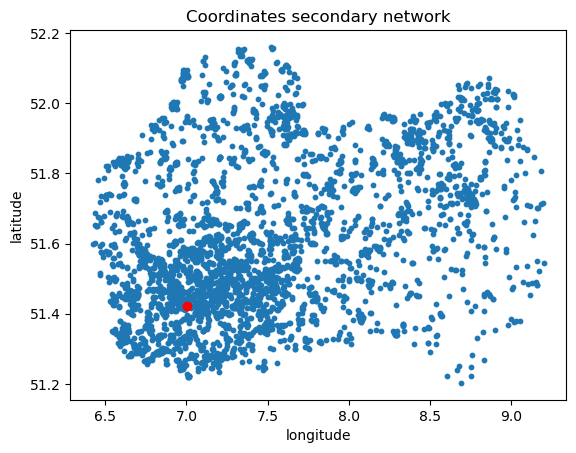

In [97]:
coordinates(ds_emscher, ds_emscher, 'secondary', 1000, '-', '-', '-', '-')

In [83]:
ds_emscher['id']

<xarray.DataArray 'id' (id: 3550)>
array([   1,    2,    3, ..., 3548, 3549, 3550])
Coordinates:
  * id           (id) int32 1 2 3 4 5 6 7 ... 3544 3545 3546 3547 3548 3549 3550
    elevation    (id) float64 ...
    lon          (id) float64 6.549 6.527 6.536 6.546 ... 8.434 8.638 8.876
    lat          (id) float64 51.43 51.44 51.43 51.44 ... 51.68 51.69 51.85 51.9
    mac_address  (id) <U17 ...

In [93]:
ds_emscher.sel(id=1).lon

<xarray.DataArray 'lon' ()>
array(6.548694)
Coordinates:
    id           int32 1
    elevation    float64 ...
    lon          float64 6.549
    lat          float64 51.43
    mac_address  <U17 ...
Attributes:
    units:    degrees in WGS84 projection